In [24]:
%pylab inline

import gzip
import random
import urllib

import networkx as nx
from tqdm import tqdm_notebook

from problem7 import find_all_path_lengths
from problem7 import find_average_path_length
from problem7 import find_path_lengths_from_node
from problem7 import Network
from problem7 import SmallWorldNetwork

Populating the interactive namespace from numpy and matplotlib


## Part a.

See `problem7.py`.

## Part b.

In [2]:
network = SmallWorldNetwork(20, 4, .2)

In [41]:
def to_nx(graph):
    G = nx.Graph()

    for node in graph.get_nodes():
        G.add_node(node)

    for node1 in graph.get_nodes():
        for node2 in graph.get_neighbors(node1):
            G.add_edge(node1, node2)
    
    return G

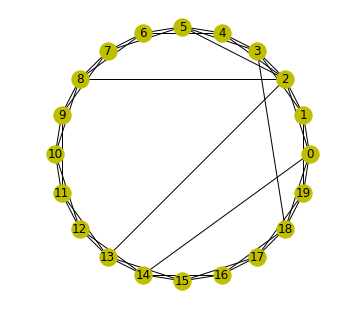

In [4]:
# Convert to a NetworkX graph to draw it.
G = to_nx(network)

figure(figsize=(4, 4))
nx.draw_circular(G, node_color='y', node_size=300, with_labels=True)

In [5]:
find_path_lengths_from_node(network, 0)

{1: 1,
 2: 1,
 14: 1,
 18: 1,
 19: 1,
 3: 2,
 4: 2,
 5: 2,
 8: 2,
 13: 2,
 12: 2,
 15: 2,
 16: 2,
 17: 2,
 6: 3,
 7: 3,
 9: 3,
 10: 3,
 11: 3}

In [6]:
all_path_lengths = find_all_path_lengths(network)

In [7]:
all_path_lengths

{(0, 1): 1,
 (0, 2): 1,
 (0, 14): 1,
 (0, 18): 1,
 (0, 19): 1,
 (0, 3): 2,
 (0, 4): 2,
 (0, 5): 2,
 (0, 8): 2,
 (0, 13): 2,
 (0, 12): 2,
 (0, 15): 2,
 (0, 16): 2,
 (0, 17): 2,
 (0, 6): 3,
 (0, 7): 3,
 (0, 9): 3,
 (0, 10): 3,
 (0, 11): 3,
 (1, 19): 1,
 (1, 2): 1,
 (1, 3): 1,
 (1, 14): 2,
 (1, 18): 2,
 (1, 4): 2,
 (1, 5): 2,
 (1, 8): 2,
 (1, 13): 2,
 (1, 17): 2,
 (1, 6): 3,
 (1, 7): 3,
 (1, 9): 3,
 (1, 10): 3,
 (1, 11): 3,
 (1, 12): 3,
 (1, 15): 3,
 (1, 16): 3,
 (2, 3): 1,
 (2, 4): 1,
 (2, 5): 1,
 (2, 8): 1,
 (2, 13): 1,
 (2, 14): 2,
 (2, 18): 2,
 (2, 19): 2,
 (2, 6): 2,
 (2, 7): 2,
 (2, 9): 2,
 (2, 10): 2,
 (2, 11): 2,
 (2, 12): 2,
 (2, 15): 2,
 (2, 16): 3,
 (2, 17): 3,
 (3, 4): 1,
 (3, 5): 1,
 (3, 18): 1,
 (3, 19): 2,
 (3, 8): 2,
 (3, 13): 2,
 (3, 6): 2,
 (3, 7): 2,
 (3, 16): 2,
 (3, 17): 2,
 (3, 14): 3,
 (3, 9): 3,
 (3, 10): 3,
 (3, 11): 3,
 (3, 12): 3,
 (3, 15): 3,
 (4, 5): 1,
 (4, 6): 1,
 (4, 8): 2,
 (4, 13): 2,
 (4, 18): 2,
 (4, 7): 2,
 (4, 14): 3,
 (4, 19): 3,
 (4, 9): 3,
 (4, 10)

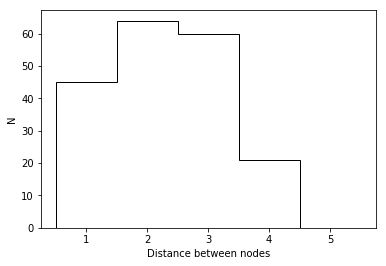

In [8]:
hist(all_path_lengths.values(), bins=np.arange(.5, 6.5), histtype='step', color='k')
xlabel('Distance between nodes')
ylabel('N');

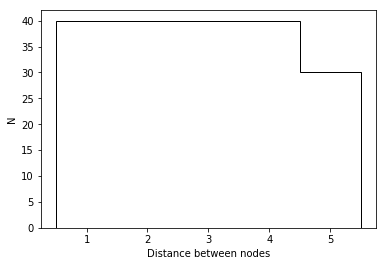

In [9]:
graph = SmallWorldNetwork(20, 4, 0)
all_path_lengths = find_all_path_lengths(graph)

hist(all_path_lengths.values(), bins=np.arange(.5, 6.5), histtype='step', color='k')
xlabel('Distance between nodes')
ylabel('N');

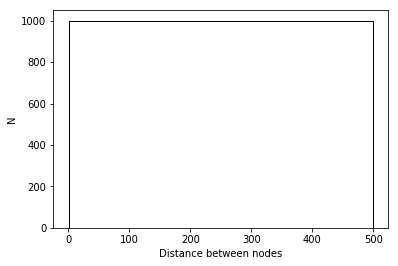

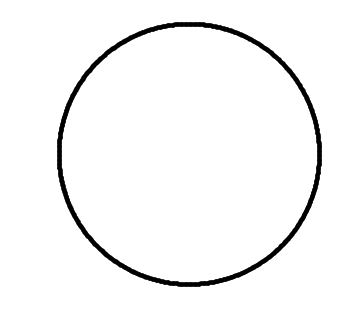

In [10]:
graph = SmallWorldNetwork(1000, 2, 0)
all_path_lengths = find_all_path_lengths(graph)
bins = np.arange(.5, max(all_path_lengths.values()) + .5)

hist(all_path_lengths.values(), bins=bins, histtype='step', color='k')
xlabel('Distance between nodes')
ylabel('N')

nxG = to_nx(graph)
figure(figsize=(4, 4))
nx.draw_circular(nxG, node_color='k', node_size=10)

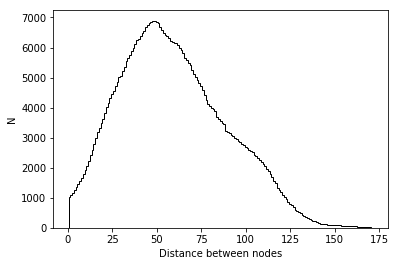

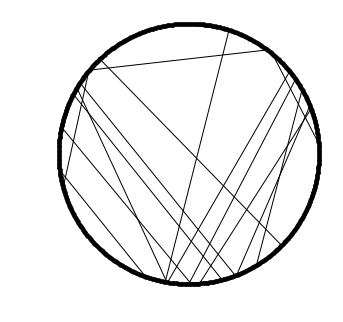

In [11]:
graph = SmallWorldNetwork(1000, 2, .02)
all_path_lengths = find_all_path_lengths(graph)
bins = np.arange(.5, max(all_path_lengths.values()) + .5)

hist(all_path_lengths.values(), bins=bins, histtype='step', color='k')
xlabel('Distance between nodes')
ylabel('N')

nxG = to_nx(graph)
figure(figsize=(4, 4))
nx.draw_circular(nxG, node_color='k', node_size=10)

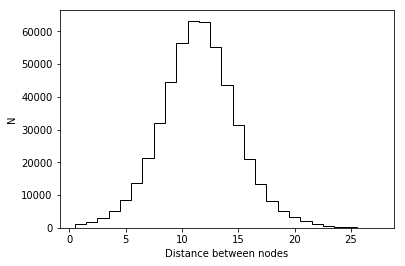

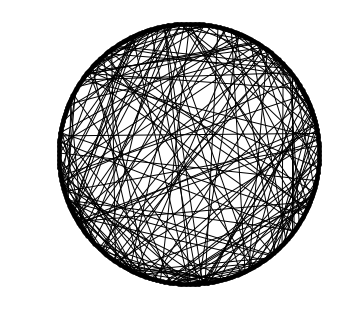

In [12]:
graph = SmallWorldNetwork(1000, 2, .2)
all_path_lengths = find_all_path_lengths(graph)
bins = np.arange(.5, max(all_path_lengths.values()) + .5)

hist(all_path_lengths.values(), bins=bins, histtype='step', color='k')
xlabel('Distance between nodes')
ylabel('N')

nxG = to_nx(graph)
figure(figsize=(4, 4))
nx.draw_circular(nxG, node_color='k', node_size=10)

The mean distance appears to decrease with $1 / \sqrt{p}$.  To get 6 degrees of separation we would therefore need to decrease the mean by a factor of 2, which would mean increasing $p$ by a factor of 4.  Thus we should have $p \sim 0.8$.

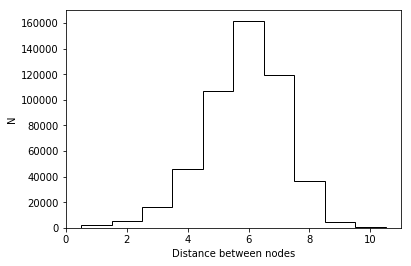

In [13]:
graph = SmallWorldNetwork(1000, 2, .8)
all_path_lengths = find_all_path_lengths(graph)
bins = np.arange(.5, max(all_path_lengths.values()) + .5)

hist(all_path_lengths.values(), bins=bins, histtype='step', color='k')
xlabel('Distance between nodes')
ylabel('N');

In [14]:
for _ in range(6):
    print(find_average_path_length(SmallWorldNetwork(100, 2, .1)))

8.824444444444444
9.581212121212122
10.803232323232324
10.782626262626263
9.945454545454545
8.971717171717172


There should be $pLZ/2 = 10$ shortcut connections on average.  The mean may be skewed by variation in the long tail of the distribution of path lengths.  These outliers will be more sensitive to precisely where the 10 shortcut connections fall.

## Part c.

In [27]:
L = 50
Z = 2
ps = np.logspace(-3, 0, num=50)
normalization = find_average_path_length(SmallWorldNetwork(L, Z, 0))
mean_ls = [find_average_path_length(SmallWorldNetwork(L, Z, p)) / normalization for p in ps]

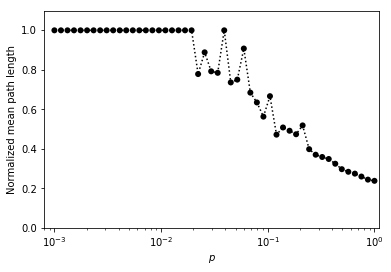

In [30]:
scatter(ps, mean_ls, c='k', edgecolor='none')
plot(ps, mean_ls, c='k', linestyle=':')
xscale('log')
xlim([8e-4, 1.1])
ylim([0, 1.1])
xlabel('$p$')
ylabel('Normalized mean path length');

## Part d.

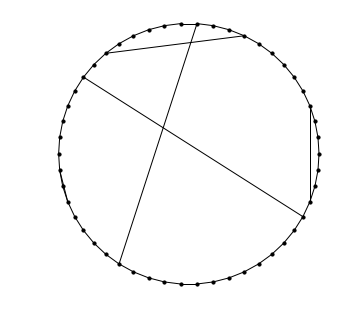

In [42]:
graph = SmallWorldNetwork(50, 2, .1)

nxG = to_nx(graph)
figure(figsize=(4, 4))
nx.draw_circular(nxG, node_color='k', node_size=10)

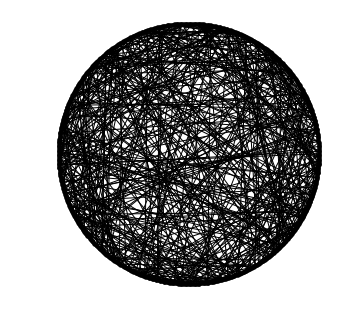

In [43]:
graph = SmallWorldNetwork(1000, 10, .1)

nxG = to_nx(graph)
figure(figsize=(4, 4))
nx.draw_circular(nxG, node_color='k', node_size=10)

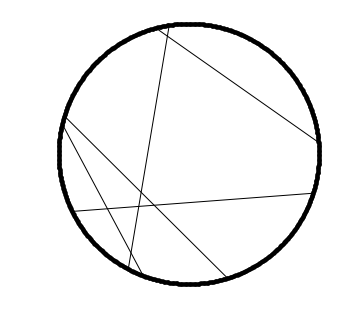

In [44]:
graph = SmallWorldNetwork(1000, 10, .001)

nxG = to_nx(graph)
figure(figsize=(4, 4))
nx.draw_circular(nxG, node_color='k', node_size=10)

The second system looks more similar to the original.

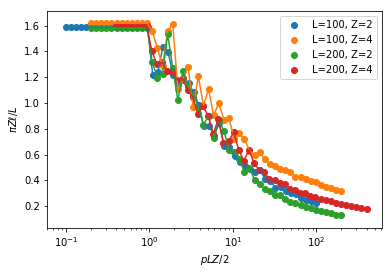

In [2]:
ps = ps = np.logspace(-3, 0, num=50)
for L in [100, 200]:
    for Z in [2, 4]:
        mean_ls = np.array([find_average_path_length(SmallWorldNetwork(L, Z, p)) for p in ps])
        scatter(ps * L * Z / 2, mean_ls * np.pi * Z / L, label=f'L={L}, Z={Z}')
        plot(ps * L * Z / 2, mean_ls * np.pi * Z / L)

xscale('log')
xlabel('$pLZ/2$')
ylabel('$\pi Z \ell / L$')
legend(loc='upper right');

## Part e.

In [2]:
# Download the high-energy physics citation graph.
response = urllib.request.urlopen('https://snap.stanford.edu/data/cit-HepPh.txt.gz')
gzipped_data = response.read()

In [5]:
data = gzip.decompress(gzipped_data).decode('utf8')

In [6]:
graph = Network()
for line in data.split('\r\n'):
    if line.startswith('#') or line == '':
        continue
    
    node1, node2 = map(int, line.split('\t'))
    graph.add_node(node1)
    graph.add_node(node2)
    graph.add_edge(node1, node2)

In [34]:
N = 100
sample = np.random.choice(list(graph.get_nodes()), N, replace=False)
lengths = []
for node in tqdm_notebook(sample):
    lengths.extend(list(find_path_lengths_from_node(graph, node).values()))
lengths = np.array(lengths)

In [37]:
np.mean(lengths)

4.359859830907966

In [38]:
np.max(lengths)

11

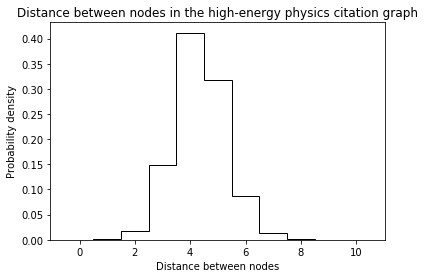

In [43]:
hist(lengths, bins=np.arange(-.5, 11.5), histtype='step', normed=True, color='k')
xlabel('Distance between nodes')
ylabel('Probability density')
title('Distance between nodes in the high-energy physics citation graph');